# Visualize ??? patterns

In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import seaborn as sns
import numpy as np
from ponyo import utils
from generic_expression_patterns_modules import new_experiment_process

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
Using TensorFlow backend.


In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_new_experiment.tsv")
)

params = utils.read_config(config_filename)

In [3]:
# Load data

# Summary data using abs value of test statistic
cis_filename = "generic_gene_summary_cis-par-KU1919.tsv"
gem_filename = "generic_gene_summary_gem-par-KU1919.tsv"
cis_gem_filename = "generic_gene_summary_cis-gem-par-KU1919.tsv"

# Raw....

test_statistic = params['rank_genes_by']

In [4]:
# User parameters

# FDR adjusted p-value cutoff to use to define DEGs
pvalue_threshold = 0.05

# Get predicted generic DEGs using z-score cutoff
# Z-score cutoff was found by calculating the score
# whose invnorm(0.05/17755). Here we are using a p-value = 0.05
# with a Bonferroni correction for 5549 tests, which are
# the number of recount genes
zscore_threshold = 4.68

## DEGs found using traditional criteria and using z-score

When performing DE analysis, this can return hundreds of genes using traditional criteria (FDR adjusted p-value < 0.05 and log2 fold change > 2). We want to see what genes are selected when we add z-score as an additional criteria to indicate genes that are specific to the pertubagen in question.

### cis-resistant vs parental

In [5]:
cis_summary_df = pd.read_csv(cis_filename, sep="\t", index_col=0, header=0)

(DEGs_cis_df,
 degs_cis_traditional,
 degs_cis_specific,
 degs_cis_generic,
 degs_cis_intersect,
 degs_cis_intersect_generic,
 degs_cis_diff) = new_experiment_process.get_and_save_DEG_lists(
    cis_summary_df,
    test_statistic,
    pvalue_threshold, 
    zscore_threshold
)

No. of DEGs using traditional criteria: 1762
No. of specific DEGs using z-score: 8
No. of generic DEGs using z-score: 3401
No. of traditional DEGs that are specific by z-score criteria: 8
No. of specific DEGs that were not found by traditional criteria: 0
No. of traditional DEGs that are generic by z-score criteria: 1754


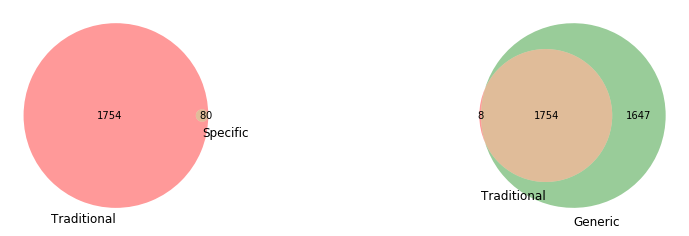

In [6]:
new_experiment_process.plot_venn(degs_cis_traditional, degs_cis_specific, degs_cis_generic)

### gem-resistant vs parental

In [7]:
gem_summary_df = pd.read_csv(gem_filename, sep="\t", index_col=0, header=0)

(DEGs_gem_df,
 degs_gem_traditional,
 degs_gem_specific,
 degs_gem_generic,
 degs_gem_intersect,
 degs_gem_intersect_generic,
 degs_gem_diff) = new_experiment_process.get_and_save_DEG_lists(
    gem_summary_df,
    test_statistic,
    pvalue_threshold, 
    zscore_threshold
)

No. of DEGs using traditional criteria: 2076
No. of specific DEGs using z-score: 24
No. of generic DEGs using z-score: 3697
No. of traditional DEGs that are specific by z-score criteria: 23
No. of specific DEGs that were not found by traditional criteria: 1
No. of traditional DEGs that are generic by z-score criteria: 2053


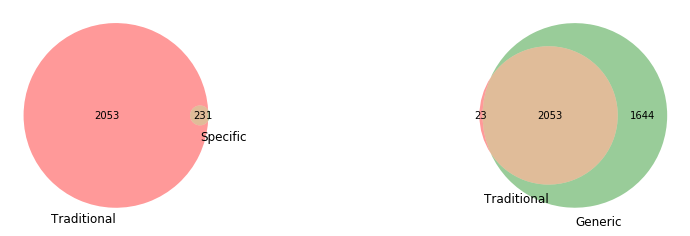

In [8]:
new_experiment_process.plot_venn(degs_gem_traditional, degs_gem_specific, degs_gem_generic)

### cis-gem resistant vs parental

In [9]:
cis_gem_summary_df = pd.read_csv(cis_gem_filename, sep="\t", index_col=0, header=0)

(DEGs_cis_gem_df,
 degs_cis_gem_traditional,
 degs_cis_gem_specific,
 degs_cis_gem_generic,
 degs_cis_gem_intersect,
 degs_cis_gem_intersect_generic,
 degs_cis_gem_diff) = new_experiment_process.get_and_save_DEG_lists(
    cis_gem_summary_df,
    test_statistic,
    pvalue_threshold, 
    zscore_threshold
)

No. of DEGs using traditional criteria: 2231
No. of specific DEGs using z-score: 14
No. of generic DEGs using z-score: 3980
No. of traditional DEGs that are specific by z-score criteria: 14
No. of specific DEGs that were not found by traditional criteria: 0
No. of traditional DEGs that are generic by z-score criteria: 2217


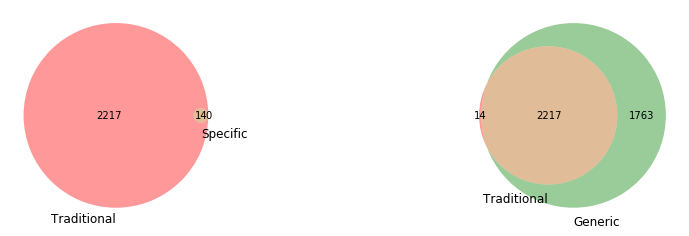

In [10]:
new_experiment_process.plot_venn(degs_cis_gem_traditional, degs_cis_gem_specific, degs_cis_gem_generic)

### Summary table

In [11]:
# Save DEGs to file to share with Hogan lab
degs_all_df = pd.DataFrame({'cis traditional + specific': pd.Series(degs_cis_intersect),
                            'cis specific only': pd.Series(degs_cis_diff),
                            'cis traditional + generic': pd.Series(degs_cis_intersect_generic),
                            'gem traditional + specific': pd.Series(degs_gem_intersect),
                            'gem specific only': pd.Series(degs_gem_diff),
                            'gem traditional + generic': pd.Series(degs_gem_intersect_generic),
                            'cis-gem traditional + specific': pd.Series(degs_cis_gem_intersect),
                            'cis-gem specific only': pd.Series(degs_cis_gem_diff),
                            'cis-gem traditional + generic': pd.Series(degs_cis_gem_intersect_generic),                           
                           })
degs_all_df.to_csv("DEGs_BladderCancer_KU1919.tsv", sep="\t")